### Undersampling (subamostragem)

* Seleciona uma amostra da classe que tem mais elementos, de 5000 vai para 500 para ficar igual aos 500 da outra classe
* Perda de informação se for uma base dados grande
---

### Oversampling (sobreamostragem)

* A classe menor faz uma 'copia' da classe maior, registro similares

## Imports

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

## Preprocessing

In [3]:
df_census = pd.read_csv('../data/census.csv')
df_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
np.unique(df_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

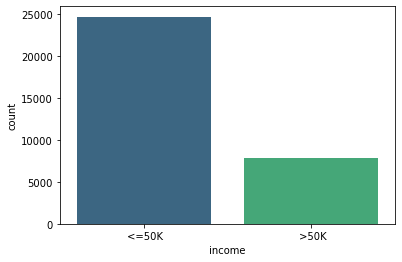

In [5]:
sns.countplot(x= df_census['income'], palette='viridis');

In [6]:
X_census = df_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [7]:
y_census = df_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### LabelEncoder

In [8]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [9]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:,13])

In [37]:
X_census.shape

(32561, 14)

# UnderSampling

* 84.70% original
* 86.49% majority
* 89.62% all

In [19]:
tl = TomekLinks(sampling_strategy= 'all')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [20]:
X_under.shape, y_under.shape

((27759, 14), (27759,))

In [21]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [22]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440], dtype=int64))

### OneHotEncoder

In [23]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')
X_under = onehotencoder_census.fit_transform(X_under).toarray()

In [24]:
X_under.shape

(27759, 108)

### StardardScaler

In [25]:
scaler_census = StandardScaler()
X_under = scaler_census.fit_transform(X_under)

In [26]:
X_under, X_under.shape

(array([[-0.25725007, -0.16595257, -0.25867975, ...,  0.11906398,
         -0.20589059, -0.00197875],
        [-0.25725007, -0.16595257, -0.25867975, ..., -0.1534586 ,
         -0.20589059, -0.00197875],
        [-0.25725007, -0.16595257, -0.25867975, ..., -0.1534586 ,
         -0.20589059, -0.00197875],
        ...,
        [-0.25725007, -0.16595257, -0.25867975, ..., -0.1534586 ,
         -0.20589059, -0.00197875],
        [-0.25725007, -0.16595257, -0.25867975, ..., -0.1534586 ,
         -0.20589059, -1.56465388],
        [-0.25725007, -0.16595257, -0.25867975, ...,  1.72988053,
         -0.20589059, -0.00197875]]),
 (27759, 108))

### Training

In [27]:
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.15, random_state= 0)

In [28]:
x_train_under.shape, x_test_under.shape

((23595, 108), (4164, 108))

In [29]:
model = RandomForestClassifier(criterion='entropy', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
model.fit(x_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [30]:
pred = model.predict(x_test_under)
print(accuracy_score(y_test_under, pred))

0.8984149855907781


In [31]:
print(classification_report(y_test_under, pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.94      3327
        >50K       0.82      0.64      0.72       837

    accuracy                           0.90      4164
   macro avg       0.87      0.80      0.83      4164
weighted avg       0.89      0.90      0.89      4164



# Oversampling

* 84.70% original
* 91% oversampling

In [10]:
smote = SMOTE(sampling_strategy= 'minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [11]:
X_over.shape

(49440, 14)

In [12]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [13]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

In [ ]:
# PC Dead
#onehotencoder_census = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')
#X_over = onehotencoder_census.fit_transform(X_over).toarray()

In [1]:
# PC Dead
#scaler_census = StandardScaler()
#X_over = scaler_census.fit_transform(X_over)

In [14]:
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.15, random_state= 0)

In [15]:
model = RandomForestClassifier(criterion='entropy', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
model.fit(x_train_over, y_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [16]:
pred = model.predict(x_test_over)
print(accuracy_score(y_test_over, pred))

0.9097896440129449


In [18]:
print(classification_report(y_test_over, pred))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

